In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
color_pal=sns.color_palette()

In [2]:
df=pd.read_csv('product e.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
df.head()

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product E,Anti Biotic Respiratory,January,2019,57650,303130,2978499,1
2019-02-01,Product E,Anti Biotic Respiratory,February,2019,66035,347219,3411712,2
2019-03-01,Product E,Anti Biotic Respiratory,March,2019,88208,463807,4557285,3
2019-04-01,Product E,Anti Biotic Respiratory,April,2019,74712,392844,3860011,4
2019-05-01,Product E,Anti Biotic Respiratory,May,2019,61172,321649,3160464,5


In [4]:
sales_e= df.drop(['Product Name','Product Category','Month','Market Size', 'Marketing Expense'],axis=1)

In [5]:
sales_e

,Year,Sales,Month No.
Month-Year,,,
2019-01-01,2019,57650,1
2019-02-01,2019,66035,2
2019-03-01,2019,88208,3
2019-04-01,2019,74712,4
2019-05-01,2019,61172,5
2019-06-01,2019,48721,6
2019-07-01,2019,51556,7
2019-08-01,2019,70726,8
2019-09-01,2019,70502,9


<Axes: title={'center': 'Product E'}, xlabel='Month-Year'>

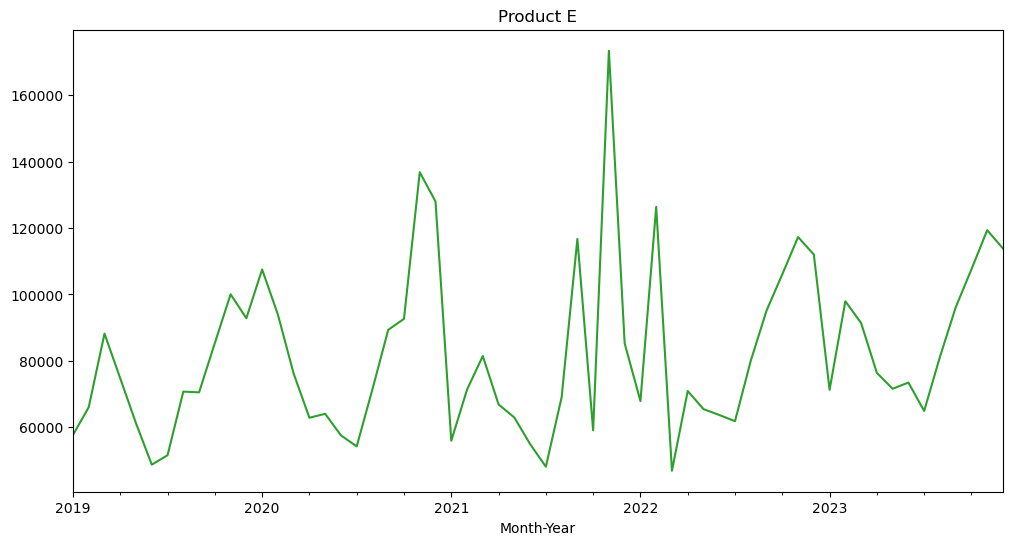

In [6]:
sales_e['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product E')

<Axes: ylabel='Frequency'>

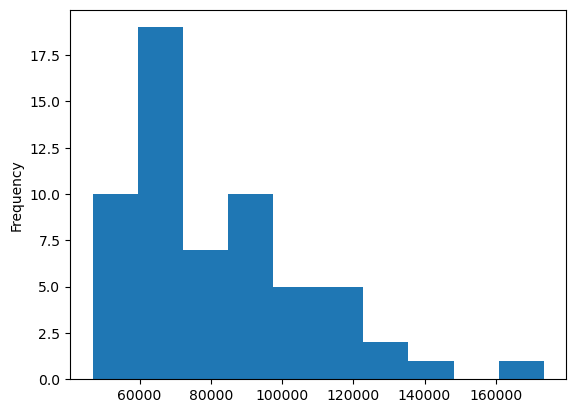

In [7]:
sales_e['Sales'].plot(kind='hist')

# Visualization

In [8]:
sales_e.head()

,Year,Sales,Month No.
Month-Year,,,
2019-01-01,2019,57650,1
2019-02-01,2019,66035,2
2019-03-01,2019,88208,3
2019-04-01,2019,74712,4
2019-05-01,2019,61172,5


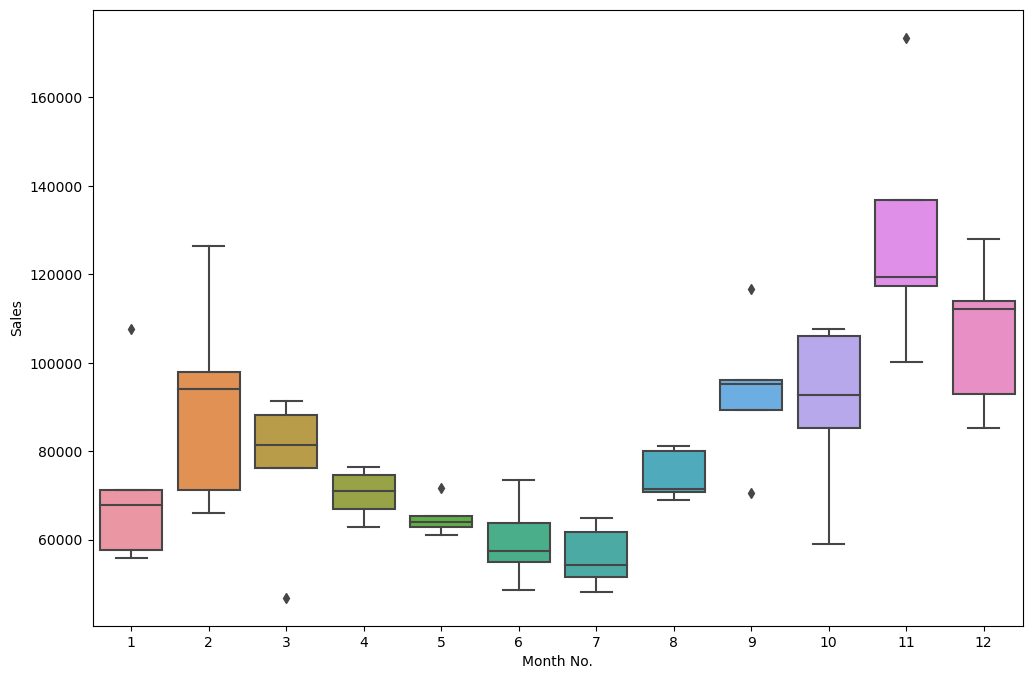

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_e, x='Month No.',y='Sales')
plt.show()

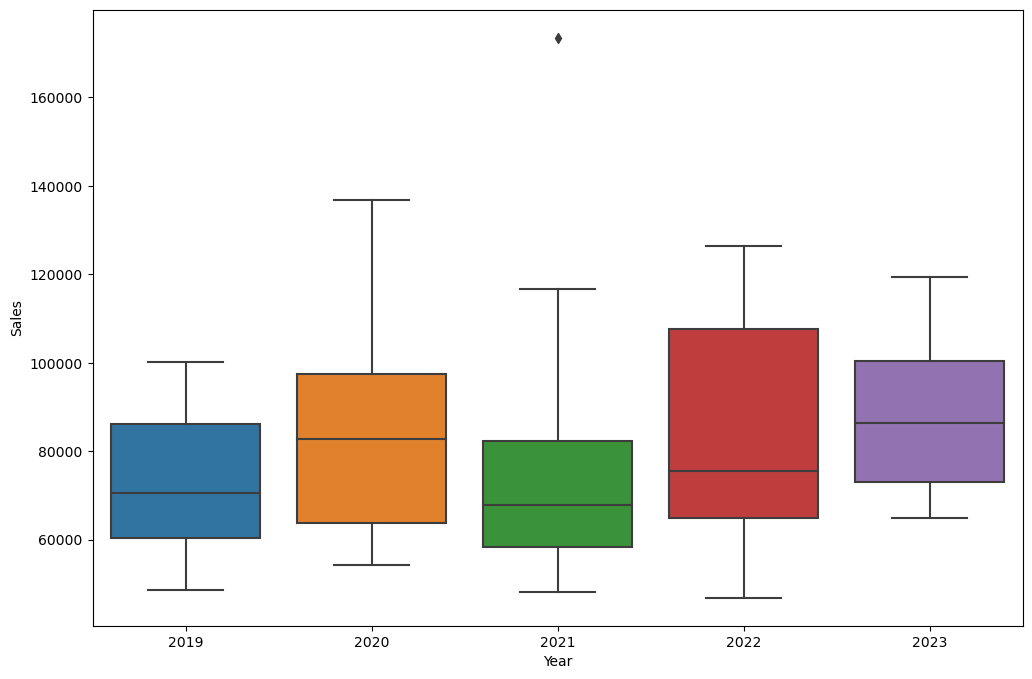

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_e, x='Year',y='Sales')
plt.show()

# Feature Engineering

In [11]:
sales_e =df.drop(['Product Name','Product Category','Month','Market Size', 'Marketing Expense','Month No.','Year'],axis=1)

In [12]:
sales_e['quarter'] = sales_e.index.quarter
sales_e['month'] = sales_e.index.month
sales_e['year'] = sales_e.index.year

In [13]:
print(sales_e)

             Sales  quarter  month  year
Month-Year                              
2019-01-01   57650        1      1  2019
2019-02-01   66035        1      2  2019
2019-03-01   88208        1      3  2019
2019-04-01   74712        2      4  2019
2019-05-01   61172        2      5  2019
2019-06-01   48721        2      6  2019
2019-07-01   51556        3      7  2019
2019-08-01   70726        3      8  2019
2019-09-01   70502        3      9  2019
2019-10-01   85353        4     10  2019
2019-11-01  100056        4     11  2019
2019-12-01   92839        4     12  2019
2020-01-01  107545        1      1  2020
2020-02-01   93962        1      2  2020
2020-03-01   76159        1      3  2020
2020-04-01   62855        2      4  2020
2020-05-01   64042        2      5  2020
2020-06-01   57547        2      6  2020
2020-07-01   54213        3      7  2020
2020-08-01   71457        3      8  2020
2020-09-01   89345        3      9  2020
2020-10-01   92665        4     10  2020
2020-11-01  1368

# Train/Test Split

In [14]:
train= sales_e[:48]
test=sales_e[48:]

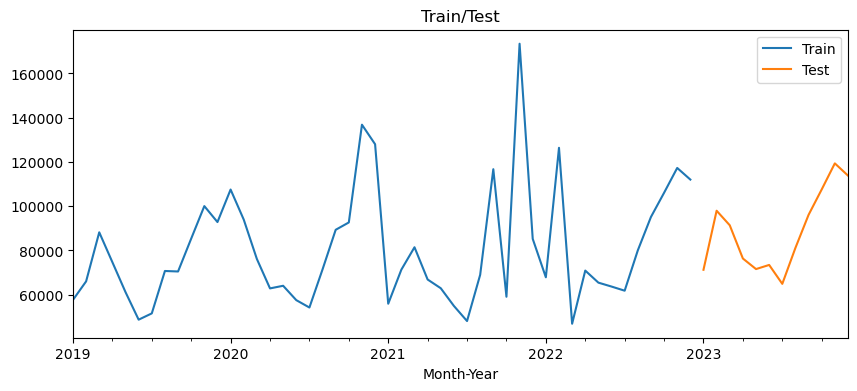

In [15]:
fig,ax=plt.subplots(figsize=(10,4))
train['Sales'].plot(ax=ax,label='Train set',title='Train/Test')
test['Sales'].plot(ax=ax,label='Test set')
plt.legend(['Train','Test'])
plt.show()

In [16]:
len(train)

48

In [17]:
x_train = train.drop(columns=['Sales'])
y_train=train['Sales']
x_test=test.drop(columns=['Sales'])
y_test=test['Sales']

In [18]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001,0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000, 2000],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Instantiate the XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Access the best parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best estimator:", best_estimator)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.7}
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [19]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=2000,
                       objective='reg:squarederror',
                       max_depth=3,
                       colsample_bytree=0.7,
                       subsample= 0.7,
                       early_stopping_rounds=50,
                       learning_rate=0.001)

reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:84559.68884	validation_1-rmse:90384.86151
[100]	validation_0-rmse:77493.83776	validation_1-rmse:83109.21662
[200]	validation_0-rmse:71097.09234	validation_1-rmse:76498.41577
[300]	validation_0-rmse:65319.27636	validation_1-rmse:70484.41833
[400]	validation_0-rmse:60083.72862	validation_1-rmse:64986.96624
[500]	validation_0-rmse:55368.23147	validation_1-rmse:60009.24409
[600]	validation_0-rmse:51142.24096	validation_1-rmse:55518.15021
[700]	validation_0-rmse:47333.05743	validation_1-rmse:51412.48367
[800]	validation_0-rmse:43942.27548	validation_1-rmse:47714.31858
[900]	validation_0-rmse:40888.86816	validation_1-rmse:44296.69435
[1000]	validation_0-rmse:38127.96783	validation_1-rmse:41160.91687
[1100]	validation_0-rmse:35690.12874	validation_1-rmse:38332.63139
[1200]	validation_0-rmse:33463.87725	validation_1-rmse:35695.77032
[1300]	validation_0-rmse:31482.84640	validation_1-rmse:33331.13655
[1400]	validation_0-rmse:29680.18677	validation_1-rmse:31105.21159
[1500]	

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [20]:
reg.best_iteration

1999

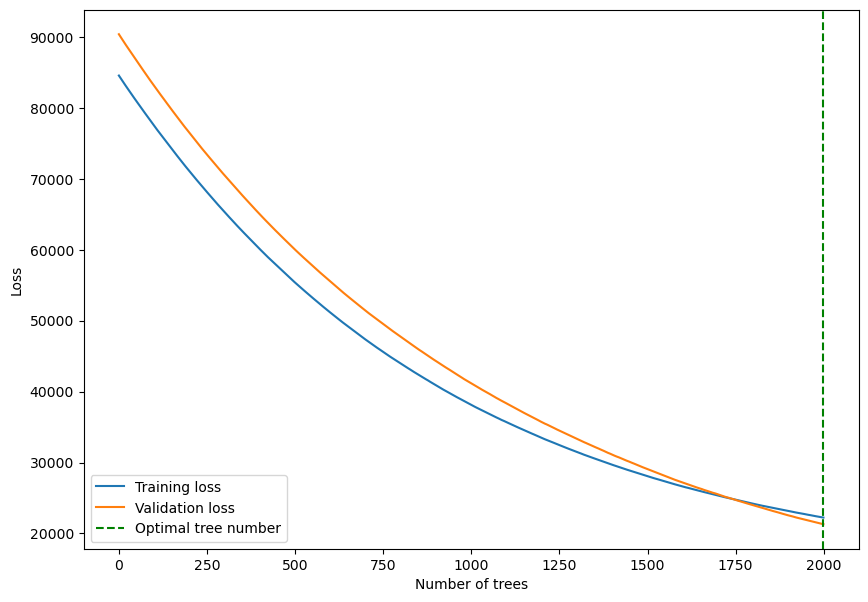

In [21]:
results = reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(1999,color='green',ls='--', label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

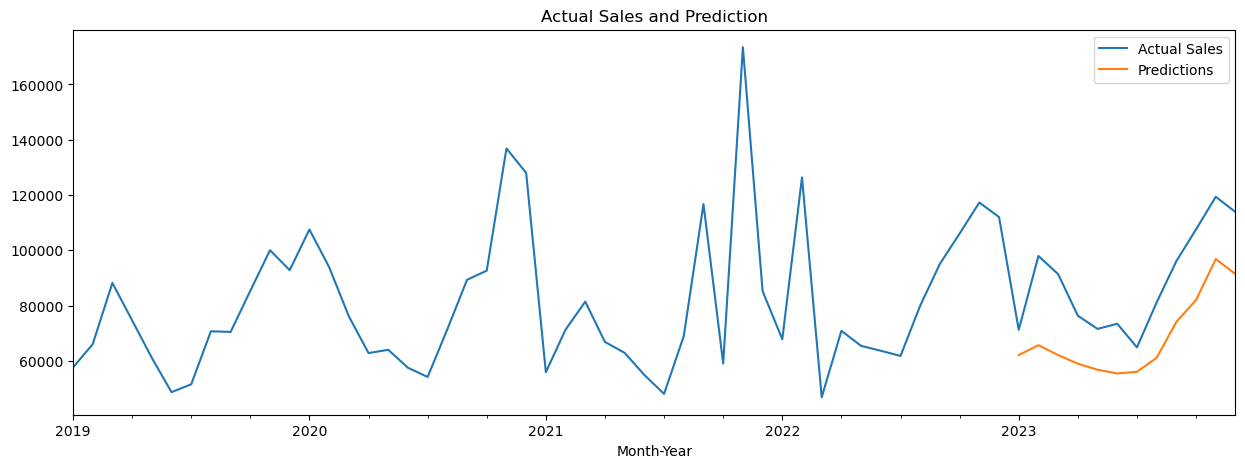

In [22]:
pred=reg.predict(x_test)
sales_e['prediction']=[None]*len(train) + list(pred)

ax = sales_e['Sales'].plot(figsize=(15, 5))
sales_e['prediction'].plot()
plt.legend(['Actual Sales', 'Predictions'])
ax.set_title('Actual Sales and Prediction')
plt.show()

In [23]:
mae_xgb= mean_absolute_error(test['Sales'],pred)
mse_xgb=mean_squared_error(test['Sales'], pred)
mape_xgb= mean_absolute_percentage_error(test['Sales'],pred)
rmse_xgb= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - XGBoost: {mae_xgb:0.3f}')
print(f'MAPE - XGBoost: {mape_xgb:0.3f}')
print(f'MSE - XGBoost: {mse_xgb:0.3f}')
print(f'RMSE - XGBoost: {rmse_xgb:0.3f}')

MAE - XGBoost: 20170.726
MAPE - XGBoost: 0.224
MSE - XGBoost: 453838478.196
RMSE - XGBoost: 21303.485


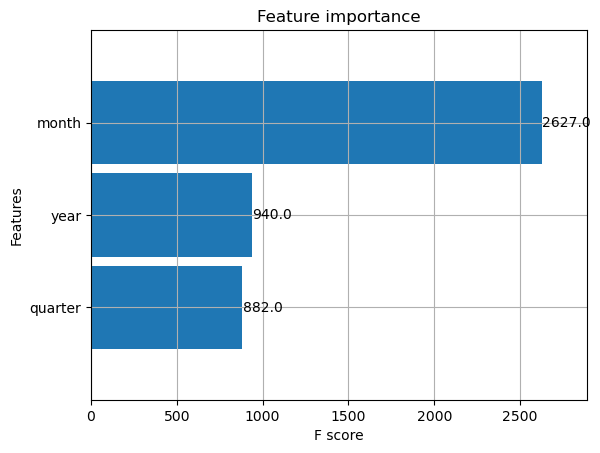

In [24]:
from xgboost import plot_importance

_ = plot_importance(reg, height=0.9)